# Improvment in calculating of radii, comparing two different results together.

* Here we import needed packages:

In [1]:
import os
import sys
import cv2
nb_dir = os.path.split(os.getcwd())[0]
if (nb_dir not in sys.path):
    sys.path.append(nb_dir)

In [2]:
import radii as radi
import SimpleITK as sitk
import matplotlib.pyplot as plt

Set path of different raw data folders and output folders.

In [3]:
amDataPath = str('../data/report/input/am/')
tifDataPath = str('../data/report/input/tif/max_z_projections/')
amOutputPath = str('../data/report/output/am/')
tifOutputPath = str('../data/report/output/tif/')

Loading the raw data for a slice and creating array of points from them

In [4]:
s13_input = amDataPath + 'S13_final_done_Alison_zScale_40.am'
s13_output_old_way = amOutputPath + 's13-old-way.am'
s13_output_improved = amOutputPath + 's13-improved.am'
s13_points_old_way = radi.spacialGraph.getSpatialGraphPoints(s13_input)
s13_points_improved = radi.spacialGraph.getSpatialGraphPoints(s13_input)
s13_points_old_way = list((map(lambda x: list(map(lambda y: int(y/0.092), x)), s13_points_old_way)))
s13_points_improved = list((map(lambda x: list(map(lambda y: int(y/0.092), x)), s13_points_improved)))

Loaiding image corresponding to the points above.

In [5]:
s13_tif = tifDataPath + 'S13_max_z_projection.tif'
#dns_s13_tif = tifOutputPath + 'dns_s13_max_z_projection.tif'
imageFileReader = sitk.ImageFileReader()
imageFileReader.SetFileName(s13_tif)
s13_image = imageFileReader.Execute()

Plotting the input tif image.

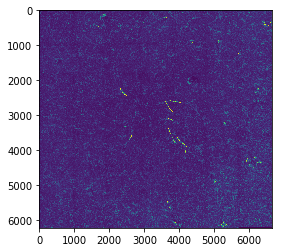

In [6]:
plt.imshow(sitk.GetArrayViewFromImage(s13_image));

In [7]:
# Here I show the problem with the previous calculated radii

In [8]:
#reload(radi)
res = radi.radius.getRadiiHalfMax(s13_image,s13_points_improved)

radii = res[1]
radii = [r*0.092 for r in radii]
radi.spacialGraph.write_spacial_graph_with_thickness(s13_input, s13_output_improved, radii)


# Images showing the radi difference between two methods

<img src="oldRadiiRes.jpg" width=500,height=60>
<img src="improvedRadiiRes.jpg" width=500,height=60>